# Movie Analysis

> Business Problem:Microsoft has decided to create a new movie studio. Microsoft wants to know what types of films are currently doing the best at the box office to help decide what type of films to create.

## Load Data and Packages

In [124]:
# importing packages
import pandas as pd
# setting pandas display to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [125]:
#Using Revenue numbers, title, and year
df_gross = pd.read_csv('data/bom.movie_gross.csv.gz')
#Using tconst(ID), genres, primary_title, runtime_minutes
df_titles = pd.read_csv('data/imdb.title.basics.csv.gz')
#Using tconst(ID), ratings, numvotes
df_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
# 
df_budget = pd.read_csv('data/tn.movie_budgets.csv.gz')

## Data Exploration

In [89]:
##df_budget.loc[df_budget['movie'] == 'Avatar']

In [88]:
##df_gross[df_gross['title'].str.contains('Avatar')]


In [90]:
##df_gross[df_gross['title'].str.contains('Dark Phoenix')]


In [60]:
##df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [61]:
##df_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [62]:
##df_gross.describe()

,domestic_gross,year
count,3359.00,3387.00
mean,28745845.07,2013.96
std,66982498.24,2.48
min,100.00,2010.00
25%,120000.00,2012.00
50%,1400000.00,2014.00
75%,27900000.00,2016.00
max,936700000.00,2018.00


In [92]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [63]:
df_titles.head(14)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.00,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,nan,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.00,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,nan,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.00,Biography


In [95]:
df_titles.describe()

,start_year,runtime_minutes
count,146144.00,114405.00
mean,2014.62,86.19
std,2.73,166.36
min,2010.00,1.00
25%,2012.00,70.00
50%,2015.00,87.00
75%,2017.00,99.00
max,2115.00,51420.00


In [ ]:

sns.countplot(x='genres', data=df_titles)
plt.title('Number of Movies Per Genre', fontsize=18)
plt.ylabel('Count', fontsize=16, limit = 5000)
plt.xlabel('Genre', fontsize=16)


In [66]:
df_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [67]:
df_ratings.describe()

,averagerating,numvotes
count,73856.00,73856.00
mean,6.33,3523.66
std,1.47,30294.02
min,1.00,5.00
25%,5.50,14.00
50%,6.50,49.00
75%,7.40,282.00
max,10.00,1841066.00


In [68]:
df_ratings.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

## Data Preparation

### To dos:
- df_budget
 - Convert budget and gross numbers to float so they can be manipulated as a number
 - Create a profit column
 - Create profit margin column
 - Create separate column for release year
- df_gross
 - Convert foreign_gross revenue numbers to float so they can be manipulated as a number
 - Create a total_gross column

- df_title
 - Reassign movies to all related genres
 - Merge df_titles and df_ratings into the same df
 
- df_ratings

 
### Future Analysis Goals: 
- Avg rating by genre
- Avg rating by Runtime
- Avg # of reviews by genre
- profit by genre
- profit margin by genre



In [111]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.00,"$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,"$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,"$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,"$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,"$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.00,$0,$0
5778,79,"Apr 2, 1999",Following,6000.00,"$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.00,"$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.00,$0,$0


In [126]:
#Convert budget and gross columns to floats in df_budget
my_cols = ['production_budget','domestic_gross','worldwide_gross']
for i in my_cols:
    df_budget[i] = df_budget[i].str.replace('$','')\
                                .str.replace(',','')\
                                .astype(float)
#Convert release_date to date
df_budget['release_date'] = pd.to_datetime(df_budget['release_date'])
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.00,0.00,0.00
5778,79,1999-04-02,Following,6000.00,48482.00,240495.00
5779,80,2005-07-13,Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,2015-09-29,A Plague So Pleasant,1400.00,0.00,0.00


In [127]:
#Add worldwide_profit and worldwide_profit_margin cols
df_budget['worldwide_profit'] = df_budget['worldwide_gross'] - df_budget['production_budget']
df_budget['worldwide_profit_margin'] = df_budget['worldwide_profit'] / df_budget['worldwide_gross']
#Add year col
df_budget['year'] = df_budget['release_date'].dt.year
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_profit_margin,year
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00,0.85,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,635063875.00,0.61,2011
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,-200237650.00,-1.34,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1072413963.00,0.76,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,999721747.00,0.76,2017
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.00,0.00,0.00,-7000.00,-inf,2018
5778,79,1999-04-02,Following,6000.00,48482.00,240495.00,234495.00,0.98,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000.00,1338.00,1338.00,-3662.00,-2.74,2005
5780,81,2015-09-29,A Plague So Pleasant,1400.00,0.00,0.00,-1400.00,-inf,2015


In [116]:
#### Delete Later
# #Remove commas from df_gross['foreign_gross'] and convert to float, so gross columns can be combined
# df_gross['foreign_gross'] = df_gross['foreign_gross'].str.replace(",","").astype(float)
# df_gross.dtypes

In [115]:
#### Delete Later
# #Create total_gross column in df_gross
# df_gross['total_gross'] = df_gross['foreign_gross'] + df_gross['domestic_gross']
# df_gross.head()

In [128]:
#Float error when using make_genre_columns function so made sure everything in genres was a string
df_titles['genres'] = df_titles['genres'].astype(str)

In [129]:
def make_genre_columns(dataframe, genre_col_name='genres', drop_genres_col=True):
    '''Creates a new DataFrame of a column for each genres from the genres column. 
    Input:
        dataframe: Original DataFrame
        genres_col_name: Name of the column of genres (values look like "Action,Adventure")
        drop_genres_col: Flag to drop the original genres column
    Returns:
        A copy of the original DataFrame with a column for each genres from the genres column
    '''
    ## Get list of unique genres
    # Join all the (unique) genres values into one big string
    list_all_genres = ','.join(dataframe[genre_col_name].unique())
    # Get a set of all unique genres (no duplicates)
    unique_genres = set(list_all_genres.split(','))
    ## Create new columns with the genres & populate with 0 & 1
    # Make a safe copy
    new_dataframe = dataframe.copy(deep=True)
    for genre in unique_genres:
        new_dataframe[genre] = new_dataframe[genre_col_name].map(lambda val: 1 if genre in val else 0)
    # Drop the unused `genre_col_name` column
    if drop_genres_col:
        new_dataframe = new_dataframe.drop([genre_col_name], axis=1)
    return new_dataframe

In [130]:
df_titles_new = make_genre_columns(df_titles)
df_titles_new.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,Fantasy,Documentary,Reality-TV,Romance,Talk-Show,...,Adventure,Biography,Drama,Music,Family,Action,Comedy,Mystery,Western,War
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [131]:
list_all_genres = ','.join(df_titles['genres'].unique())
unique_genres = list(set(list_all_genres.split(',')))
print(unique_genres)

['Fantasy', 'Documentary', 'Reality-TV', 'Romance', 'Talk-Show', 'Sci-Fi', 'Horror', 'Animation', 'Adult', 'Sport', 'Musical', 'Game-Show', 'Crime', 'Thriller', 'nan', 'News', 'Short', 'History', 'Adventure', 'Biography', 'Drama', 'Music', 'Family', 'Action', 'Comedy', 'Mystery', 'Western', 'War']


In [132]:
#Merge df_titles_new with df_ratings
df_imbd = df_titles_new.merge(df_ratings, left_on='tconst', right_on='tconst')
df_imbd.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,Fantasy,Documentary,Reality-TV,Romance,Talk-Show,...,Drama,Music,Family,Action,Comedy,Mystery,Western,War,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,0,0,0,0,0,...,1,0,0,1,0,0,0,0,7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,0,0,0,0,0,...,1,0,0,0,0,0,0,0,7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,0,0,0,0,0,...,1,0,0,0,0,0,0,0,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,0,0,0,0,0,...,1,0,0,0,1,0,0,0,6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,1,0,0,0,0,...,1,0,0,0,1,0,0,0,6.50,119


## Data Analysis

In [159]:
column_names=['genre','mean_rating', 'count_titles', 'avg_num_votes', 'avg_runtime','avg_year']
my_dict = {}
i = 0
for genre in unique_genres:
    df_genre = df_imbd[df_titles_new[genre] == 1]
    m = df_genre['averagerating'].mean()
    c = df_genre['tconst'].count()
    d = df_genre['numvotes'].mean()
    t = df_genre['runtime_minutes'].mean()
    y = df_genre['start_year'].mean()

    my_dict[i] = [genre, m,c,d,t,y]
    i = i +1

print(my_dict)
df_summary = pd.DataFrame.from_dict(my_dict, orient='index',
                       columns=column_names)



<ipython-input-159-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-159-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-159-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-159-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-159-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-159-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-159-8d916f4ab105>:5: User

{0: ['Fantasy', 6.318475517415464, 1981, 4972.192327107521, 94.57948139797068, 2014.1367995961637], 1: ['Documentary', 6.347827989497988, 25138, 2923.295170657968, 94.21889595658556, 2014.5254992441721], 2: ['Reality-TV', 6.14, 30, 1850.4666666666667, 92.51724137931035, 2015.3333333333333], 3: ['Romance', 6.3437138053428, 5353, 2951.6497291238556, 93.57407788996497, 2014.1998879133196], 4: ['Talk-Show', 6.3875, 16, 15856.625, 95.93333333333334, 2015.3125], 5: ['Sci-Fi', 6.339200809307032, 1977, 3562.380880121396, 93.17742841100505, 2014.219018715225], 6: ['Horror', 6.349288785974191, 6046, 3358.3959642739, 94.26847745750185, 2014.234039034072], 7: ['Animation', 6.303021370670603, 1357, 4279.861459100958, 94.14888337468983, 2013.969786293294], 8: ['Adult', 6.076190476190475, 21, 43186.90476190476, 100.76190476190476, 2011.0], 9: ['Sport', 6.297085020242913, 1235, 2850.3133603238866, 95.02452316076294, 2014.5344129554655], 10: ['Musical', 6.363538873994634, 746, 2607.7386058981233, 94.79

<ipython-input-159-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-159-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-159-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]


In [160]:
df_summary['percent_titles'] =1.0*df_summary['count_titles']/df_summary['count_titles'].sum()

In [161]:
df_summary

,genre,mean_rating,count_titles,avg_num_votes,avg_runtime,avg_year,percent_titles
0,Fantasy,6.32,1981,4972.19,94.58,2014.14,0.02
1,Documentary,6.35,25138,2923.30,94.22,2014.53,0.19
2,Reality-TV,6.14,30,1850.47,92.52,2015.33,0.00
3,Romance,6.34,5353,2951.65,93.57,2014.20,0.04
4,Talk-Show,6.39,16,15856.62,95.93,2015.31,0.00
5,Sci-Fi,6.34,1977,3562.38,93.18,2014.22,0.02
6,Horror,6.35,6046,3358.40,94.27,2014.23,0.05
7,Animation,6.30,1357,4279.86,94.15,2013.97,0.01
8,Adult,6.08,21,43186.90,100.76,2011.00,0.00
9,Sport,6.30,1235,2850.31,95.02,2014.53,0.01


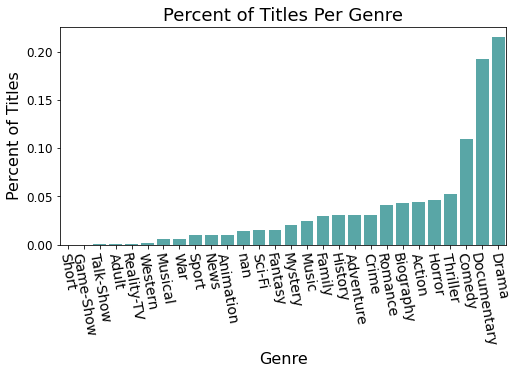

In [167]:
df_graph = df_summary.sort_values(by=['percent_titles'],ascending = True)
plt.figure(figsize=(8,4))
sns.barplot(data=df_graph, x='genre',y='percent_titles', color="aqua", saturation=.3)
plt.title('Percent of Titles Per Genre', fontsize=18)
plt.ylabel('Percent of Titles', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);

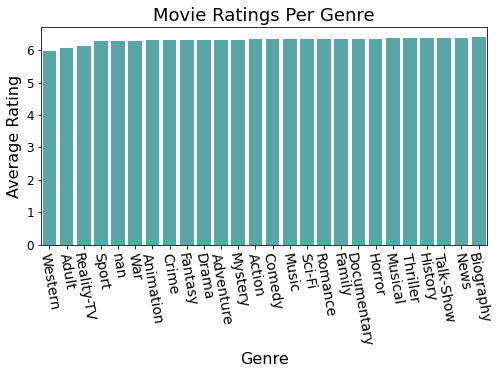

In [162]:
df_graph = df_summary[df_summary['avg_num_votes']> 100].sort_values(by=['mean_rating'],ascending = True)
plt.figure(figsize=(8,4))
sns.barplot(data=df_graph, x='genre',y='mean_rating', color="aqua", saturation=.3)
plt.title('Movie Ratings Per Genre', fontsize=18)
plt.ylabel('Average Rating', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);

Viewer ratings per genre are very similar with the exception of a slightly lower rating for Westerns. There could be a selection bias here because only individuals which have already decided they want to watch a certain genre will provide a rating.

In [136]:
df_budget.count()

id                         5782
release_date               5782
movie                      5782
production_budget          5782
domestic_gross             5782
worldwide_gross            5782
worldwide_profit           5782
worldwide_profit_margin    5782
year                       5782
dtype: int64

In [137]:
#delete later
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_profit_margin,year
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00,0.85,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,635063875.00,0.61,2011
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,-200237650.00,-1.34,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1072413963.00,0.76,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,999721747.00,0.76,2017


In [81]:
# df_tmp = df_gross.merge(df_titles_new, left_on='title', right_on='primary_title',    how="left",
# )
# df_tmp[df_tmp['df_tmp'] is null].count()

In [142]:
df_imbd_budget = df_budget.merge(df_imbd, left_on=['movie','year'], right_on=['primary_title','start_year'],    how="inner",
)
df_imbd_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_profit_margin,year,tconst,...,Drama,Music,Family,Action,Comedy,Mystery,Western,War,averagerating,numvotes
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,635063875.00,0.61,2011,tt1298650,...,0,0,0,1,0,0,0,0,6.60,447624
1,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,-200237650.00,-1.34,2019,tt6565702,...,0,0,0,1,0,0,0,0,6.00,24451
2,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1072413963.00,0.76,2015,tt2395427,...,0,0,0,1,0,0,0,0,7.30,665594
3,7,2018-04-27,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,1748134200.00,0.85,2018,tt4154756,...,0,0,0,1,0,0,0,0,8.50,670926
4,9,2017-11-17,Justice League,300000000.00,229024295.00,655945209.00,355945209.00,0.54,2017,tt0974015,...,0,0,0,1,0,0,0,0,6.50,329135


In [165]:
column_names_2=['genre','title','year', 'runtime_minutes', 'rating', 'worldwide_profit']
my_dict_2 = {}
i = 0
for genre in unique_genres:
    df_genre = df_imbd_budget[df_titles_new[genre] == 1]
    m = df_genre['primary_title']
    y = df_genre['start_year']
    t = df_genre['runtime_minutes']
    r = df_genre['averagerating']
    g = df_genre['worldwide_profit']

    my_dict[i] = [genre, m,y,t,r,g]
    i = i +1

print(my_dict_2)
df_summary_2 = pd.DataFrame.from_dict(my_dict_2, orient='index',
                       columns=column_names_2)


{}


<ipython-input-165-d7fabcc9b1e4>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd_budget[df_titles_new[genre] == 1]
<ipython-input-165-d7fabcc9b1e4>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd_budget[df_titles_new[genre] == 1]
<ipython-input-165-d7fabcc9b1e4>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd_budget[df_titles_new[genre] == 1]
<ipython-input-165-d7fabcc9b1e4>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd_budget[df_titles_new[genre] == 1]
<ipython-input-165-d7fabcc9b1e4>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd_budget[df_titles_new[genre] == 1]
<ipython-input-165-d7fabcc9b1e4>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd_budget[df_titles_new[genre] == 1

In [166]:
df_summary_2

,genre,title,year,runtime_minutes,rating,worldwide_profit


In [ ]:
df_graph = df_title_profit.sort_values(by=['total_gross'],ascending = True)
plt.figure(figsize=(8,4))
sns.barplot(data=df_graph, x='genre',y='mean_rating', color="blue", saturation=.3)
plt.title('Movie Ratings Per Genre', fontsize=18)
plt.ylabel('Average Rating', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);

In [49]:
df_title_profit.describe()

,start_year,runtime_minutes,Fantasy,Documentary,Reality-TV,Romance,Talk-Show,Sci-Fi,Horror,Animation,...,Drama,Music,Family,Action,Comedy,Mystery,Western,War,domestic_gross,year
count,1873.00,1863.00,1873.00,1873.00,1873.00,1873.00,1873.00,1873.00,1873.00,1873.00,...,1873.00,1873.00,1873.00,1873.00,1873.00,1873.00,1873.00,1873.00,1863.00,1873.00
mean,2014.00,110.33,0.07,0.06,0.00,0.16,0.00,0.06,0.08,0.06,...,0.52,0.04,0.04,0.28,0.35,0.07,0.01,0.01,42360553.29,2014.00
std,2.52,20.48,0.25,0.24,0.00,0.37,0.00,0.23,0.27,0.24,...,0.50,0.19,0.20,0.45,0.48,0.26,0.08,0.11,76831752.43,2.52
min,2010.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,300.00,2010.00
25%,2012.00,96.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,552000.00,2012.00
50%,2014.00,107.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10500000.00,2014.00
75%,2016.00,122.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,51500000.00,2016.00
max,2018.00,189.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,700100000.00,2018.00


In [41]:
df_gross.describe()

,domestic_gross,foreign_gross,year,total_gross
count,3359.00,2037.00,3387.00,2009.00
mean,28745845.07,74872810.15,2013.96,122691333.58
std,66982498.24,137410600.84,2.48,207487031.92
min,100.00,600.00,2010.00,4900.00
25%,120000.00,3700000.00,2012.00,8141000.00
50%,1400000.00,18700000.00,2014.00,42300000.00
75%,27900000.00,74900000.00,2016.00,133700000.00
max,936700000.00,960500000.00,2018.00,1518900000.00


## Summary

### Conclusions:
- No strong pattern in ratings by genre
- Genres with most titles:
    1. Drama
    2. Documentary
    3. Comedy

### Data Limitations
- Expand Budget data for more titles
- Most years between 2013 - 2015?


### Reccommendations:

